# Introduction

This notebook will examine the concepts behind SVD via image processing procedures and number classification.

The data I will use will be:
- USPS handwritten number image dataset (https://www.kaggle.com/bistaumanga/usps-dataset)

# Test SVD

## Import Libraries

In [15]:
import pandas as pd
import numpy as np
from scipy import linalg
from IPython.display import display, HTML
from IPython.display import Image
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Test out SVD

I will test scipy's SVD method by performing it both manually and with scipy on the matrix below:

\begin{bmatrix}
  4 & 11 & 14 \\ 8 & 7 & -2
\end{bmatrix}

In [2]:
testMatrix = np.array([[4,11, 14],[8, 7, -2]])
print(testMatrix)

[[ 4 11 14]
 [ 8  7 -2]]


### Manual Test

<b>Step 1</b><br><br> Find <b><i>A<sup>T</sup>A</b></i>

In [3]:
symmMatrix = np.transpose(testMatrix).dot(testMatrix)
print(symmMatrix)

[[ 80 100  40]
 [100 170 140]
 [ 40 140 200]]


<b>Step 2</b><br><br> Find eigenvalues and eigenvectors of <b><i>A<sup>T</sup>A</b></i> <br><p>Note: we're the economy version of SVD</p>

In [4]:
eigen = linalg.eig(symmMatrix)
egnval = np.real(np.round(eigen[0][::2]))
egnvec = np.round(eigen[1][:,::2], 3)
print("Eigenvalues: \n" + str(egnval))
print("Eigenvectors: \n" + str(egnvec))

Eigenvalues: 
[360.  90.]
Eigenvectors: 
[[-0.333 -0.667]
 [-0.667 -0.333]
 [-0.667  0.667]]


<b>Step 3</b><br><br> Find <b><i>U</sup>$\Sigma$V<sup>T</b></i>

In [5]:
u = testMatrix.dot(egnvec).dot(np.diag(1/np.sqrt(egnval)))
sigma = np.diag(np.sqrt(egnval))
vT = np.transpose(egnvec)
print("U: \n" + str(np.round(u, 3)))
print("\u03A3: \n" + str(np.round(sigma, 3)))
print("Vᵀ: \n" + str((vT)))

U: 
[[-0.949  0.317]
 [-0.316 -0.949]]
Σ: 
[[18.974  0.   ]
 [ 0.     9.487]]
Vᵀ: 
[[-0.333 -0.667 -0.667]
 [-0.667 -0.333  0.667]]


#### Check our work

In [6]:
A = (u.dot(sigma)).dot(vT)
np.round(A)

array([[ 4., 11., 14.],
       [ 8.,  7., -2.]])

It's the same matrix we started with! Out SVD test was done correctly.

### Using the scipy Library

In [7]:
linalg.svd(testMatrix)

(array([[-0.9486833 , -0.31622777],
        [-0.31622777,  0.9486833 ]]),
 array([18.97366596,  9.48683298]),
 array([[-0.33333333, -0.66666667, -0.66666667],
        [ 0.66666667,  0.33333333, -0.66666667],
        [-0.66666667,  0.66666667, -0.33333333]]))

As we can see, the scipy library returns the same <b><i>U</sup>$\Sigma$V<sup>T</b></i> (it returned an eigenvector associated with a zero singular component though)

# Data Cleaning

I will use pixel image data provided by USPS.


The data has already been pre-processed somewhat by University of the Pacific's Data Science department, but you can find the full dataset here: https://www.kaggle.com/bistaumanga/usps-dataset.


The data is already split as training and testing dataframes with around a 45/55 split.

In [69]:
trainx = pd.read_csv("./data/trainInput.csv", header=None)
trainy = pd.read_csv("./data/trainOutput.csv", header = None)
testx = pd.read_csv("./data/testInput.csv", header = None)
testy = pd.read_csv("./data/testOutput.csv", header = None)

#### Minor data exploration

In [70]:
display(trainx.head())
display(trainy)
print("train x shape: " + str(trainx.shape))
print("train y shape: " + str(trainy.shape))
print("test x shape: " + str(testx.shape))
print("test y shape: " + str(testy.shape))

,0,1,2,3,4,5,6,7,8,9,...,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706
0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,...,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000
1,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,...,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000
2,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,...,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000
3,-1.0,-0.813,-1.0,-1.0,-1.0,-1.0,-0.830,-1.0,-1.0,-1.0,...,-1.000,-0.567,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000
4,-1.0,-0.671,-1.0,-1.0,-1.0,-1.0,0.442,-1.0,-1.0,-1.0,...,-0.986,-0.064,-1.0,-1.0,-1.0,-1.0,-1.0,-0.948,-1.0,-0.338


,0,1,2,3,4,5,6,7,8,9,...,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706
0,6,5,4,7,3,6,3,1,0,1,...,8,0,5,1,9,8,9,7,9,8


train x shape: (256, 1707)
train y shape: (1, 1707)
test x shape: (256, 2007)
test y shape: (1, 2007)


The data holds grayscale images of numbers sized at 16 x 16 pixels

I will tranpose the train and test dataframes so that each image is a row and each feature is represented by the columns

In [71]:
trainx = np.transpose(trainx).copy()
trainy = np.transpose(trainy).copy()
testx = np.transpose(testx).copy()
testy = np.transpose(testy).copy()

Now, I will separate the images by number

In [72]:
dfs = []
for i in np.sort(pd.unique(trainy.loc[:,0])):
    dfs.append(trainx.loc[trainy.iloc[:, 0] == i])

We'll pick 10 random numbers from each dataframe and print them to check our work

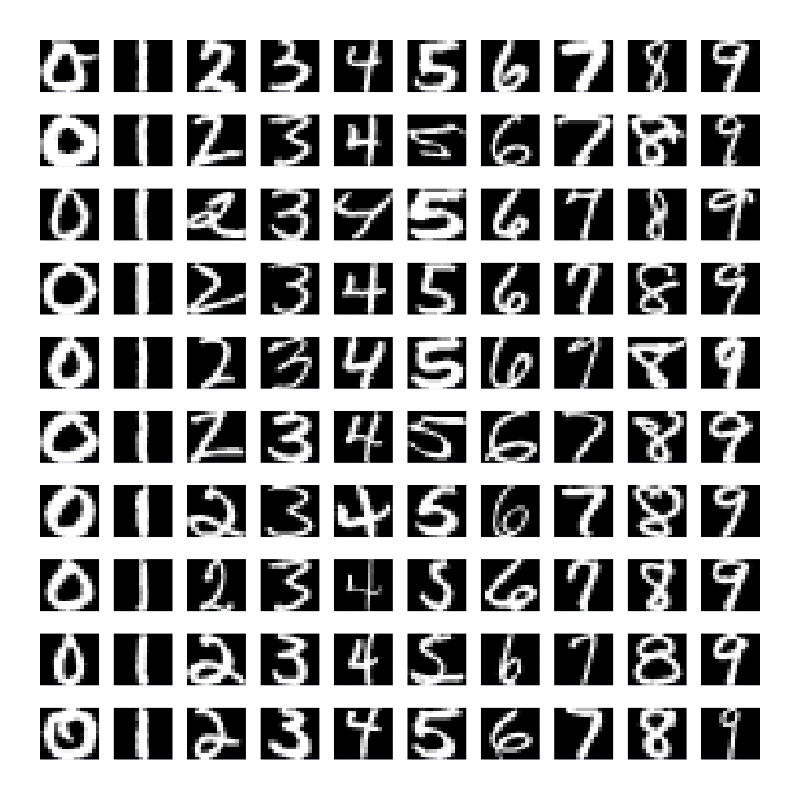

In [73]:
import plotly.io as pio
fig = make_subplots(rows=10, cols=10, shared_yaxes=True, shared_xaxes = True,subplot_titles =None, row_titles  = None)
for col, df in enumerate(dfs):
    rand = np.random.randint(0, len(dfs[col]), 10)
    for row, idx in enumerate(rand):
        fig.add_trace(px.imshow(df.iloc[idx,:].values.reshape((16, 16)), binary_string=True).data[0],
              row=row + 1, col=col + 1)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
Image(fig.to_image(format="png", width=400, height=400, scale=2, engine="kaleido"))

# Number Classification with SVD

In [40]:
First we'll

In [74]:
linalg.svd(dfs[0])[2].shape

(256, 256)

In [78]:
testx.loc[0].values.shape

(256,)

In [81]:
np.linalg.inv(linalg.svd(dfs[0])[2]).dot(testx.loc[0]).shape

(256,)

In [82]:
testMatrix =  np.transpose(np.array([[0.56, 0.59, 0.56, 0.09, 0.09],[0.13, -0.03, 0.13, -0.69, -0.69]]))

In [83]:
testMatrix

array([[ 0.56,  0.13],
       [ 0.59, -0.03],
       [ 0.56,  0.13],
       [ 0.09, -0.69],
       [ 0.09, -0.69]])

In [95]:
testMatrix.shape

(5, 2)

In [89]:
testInput = np.array([0,1,0,2,2])

In [90]:
testInput.dot(testMatrix)

array([ 0.95, -2.79])

In [103]:
np.linalg.pinv(testMatrix).dot(testInput)

array([ 0.96870748, -2.83066594])

In [105]:
testMatrix.dot(np.linalg.pinv(testMatrix).dot(testInput))

array([0.17448962, 0.65645739, 0.17448962, 2.04034317, 2.04034317])

V is pixel to concept mapping(the concept is the digit's attributes)

In [ ]:
Each eigenvector in V is a singular image()